In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
import pandas as pd

In [4]:
dog_breeds = '''Breed 	rank
Retrievers (Labrador)  	1
French Bulldogs	2
Retrievers (Golden) 	3
German Shepherd Dogs	4
Poodles	5
Bulldogs	6
Beagles	7
Rottweilers	8
Pointers (German Shorthaired)	9
Dachshunds	10
Pembroke Welsh Corgis	11
Australian Shepherds	12
Yorkshire Terriers	13
Boxers	14
Cavalier King Charles Spaniels	15
Doberman Pinschers	16
Great Danes	17
Miniature Schnauzers	18
Siberian Huskies	19
Bernese Mountain Dogs	20
Cane Corso	21
Shih Tzu	22
Boston Terriers	23
Pomeranians	24
Havanese	25
Spaniels (English Springer)	26
Brittanys	27
Shetland Sheepdogs	28
Spaniels (Cocker)	29
Miniature American Shepherds	30
Border Collies	31
Vizslas	32
Pugs	33
Basset Hounds	34
Mastiffs	35
Belgian Malinois	36
Chihuahuas	37
Collies	38
Maltese	39
Weimaraners	40
Rhodesian Ridgebacks	41
Shiba Inu	42
Spaniels (English Cocker)	43
Portuguese Water Dogs	44
Newfoundlands	45
West Highland White Terriers	46
Bichons Frises	47
Retrievers (Chesapeake Bay)	48
Dalmatians	49
Bloodhounds	50
Australian Cattle Dogs	51
Akitas	52
St. Bernards	53
Papillons	54
Samoyeds	55
Bullmastiffs	56
Whippets	57
Scottish Terriers	58
Pointers (German Wirehaired)	59
Wirehaired Pointing Griffons	60
Bull Terriers	61
Airedale Terriers	62
Great Pyrenees	63
Chinese Shar-Pei	64
Giant Schnauzers	65
Soft Coated Wheaten Terriers	66
Cardigan Welsh Corgis	67
Alaskan Malamutes	68
Old English Sheepdogs	69
Dogues de Bordeaux	70
Setters (Irish)	71
Russell Terriers	72
Italian Greyhounds	73
Cairn Terriers	74
Staffordshire Bull Terriers	75
Miniature Pinschers	76
Chinese Crested	77
Greater Swiss Mountain Dogs	78
Lagotti Romagnoli	79
Chow Chows	80
American Staffordshire Terriers	81
Biewer Terriers	82
Coton de Tulear	83
Lhasa Apsos	84
Irish Wolfhounds	85
Rat Terriers	86
Basenjis	87
Anatolian Shepherd Dogs	88
Dogo Argentinos	89
Spaniels (Boykin)	90
Border Terriers	91
Retrievers (Nova Scotia Duck Tolling)	92
Retrievers (Flat-Coated)	93
Pekingese	94
Keeshonden	95
Standard Schnauzers	96
Brussels Griffons	97
Setters (English)	98
Fox Terriers (Wire)	99
Norwegian Elkhounds	100'''
import io
breeds = pd.read_csv(io.StringIO(dog_breeds), sep='\t')
breeds

,Breed,rank
0,Retrievers (Labrador),1
1,French Bulldogs,2
2,Retrievers (Golden),3
3,German Shepherd Dogs,4
4,Poodles,5
...,...,...
95,Standard Schnauzers,96
96,Brussels Griffons,97
97,Setters (English),98
98,Fox Terriers (Wire),99


In [5]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

!pip install fastai duckduckgo_search

  Using cached torch-1.12.1-cp39-cp39-manylinux1_x86_64.whl (776.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 15.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:


      Successfully uninstalled numpy-1.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('goat photos', max_images=1)
urls[0]

Searching for 'goat photos'


'https://images.pexels.com/photos/1011630/pexels-photo-1011630.jpeg?cs=srgb&dl=animal-white-young-1011630.jpg&fm=jpg'

/home/jong/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


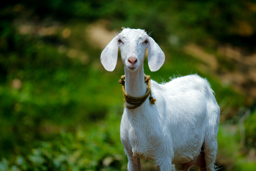

In [8]:
from fastdownload import download_url
dest = 'goat.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sheep photos'


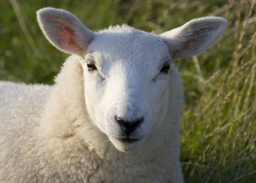

In [9]:
download_url(search_images('sheep photos', max_images=1)[0], 'sheep.jpg', show_progress=False)
Image.open('sheep.jpg').to_thumb(256,256)

In [22]:
next(breeds.itertuples())

Pandas(Index=0, _1='Retrievers (Labrador)  ', rank=1)

In [23]:
path = Path('dog_breeds')
from time import sleep

for row in breeds.itertuples():
    o = row._1
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(5)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} cute photo'))
    sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Retrievers (Labrador)   photo'
Searching for 'Retrievers (Labrador)   cute photo'
Searching for 'French Bulldogs photo'
Searching for 'French Bulldogs cute photo'
Searching for 'Retrievers (Golden)  photo'
Searching for 'Retrievers (Golden)  cute photo'
Searching for 'German Shepherd Dogs photo'
Searching for 'German Shepherd Dogs cute photo'


/home/jong/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Searching for 'Poodles photo'
Searching for 'Poodles cute photo'
Searching for 'Bulldogs photo'
Searching for 'Bulldogs cute photo'
Searching for 'Beagles photo'
Searching for 'Beagles cute photo'
Searching for 'Rottweilers photo'
Searching for 'Rottweilers cute photo'
Searching for 'Pointers (German Shorthaired) photo'
Searching for 'Pointers (German Shorthaired) cute photo'
Searching for 'Dachshunds photo'
Searching for 'Dachshunds cute photo'
Searching for 'Pembroke Welsh Corgis photo'
Searching for 'Pembroke Welsh Corgis cute photo'
Searching for 'Australian Shepherds photo'
Searching for 'Australian Shepherds cute photo'
Searching for 'Yorkshire Terriers photo'
Searching for 'Yorkshire Terriers cute photo'
Searching for 'Boxers photo'
Searching for 'Boxers cute photo'
Searching for 'Cavalier King Charles Spaniels photo'
Searching for 'Cavalier King Charles Spaniels cute photo'
Searching for 'Doberman Pinschers photo'
Searching for 'Doberman Pinschers cute photo'
Searching for 'Gre

In [24]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

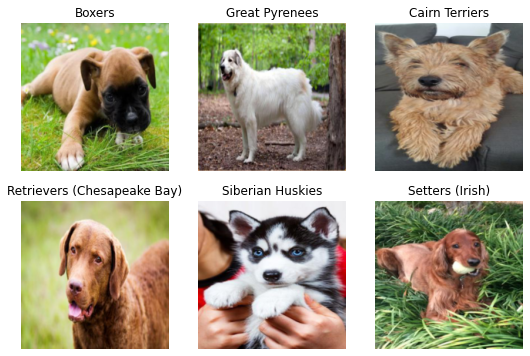

In [25]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/jong/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jong/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.708265,1.079130,0.332474,03:14


epoch,train_loss,valid_loss,error_rate,time
0,1.184040,0.845740,0.262028,04:52
1,0.704399,0.655843,0.200172,04:55
2,0.347427,0.627554,0.195017,04:53


https://images.dog.ceo/breeds/spaniel-irish/n02102973_603.jpg


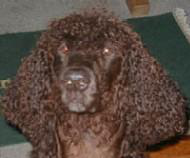

In [33]:
import requests, io

def get_dog_img(should_print=False):
    img = requests.get("https://dog.ceo/api/breeds/image/random").json()['message']
    if should_print:
        print(img)
    img = requests.get(img).content
    return PILImage.create(io.BytesIO(img))
get_dog_img(True)

In [34]:
is_bird,_,probs = learn.predict(get_dog_img(True))
print(f"This is a: {is_bird} with prob {probs[0]:.10f}")

https://images.dog.ceo/breeds/cotondetulear/100_2013.jpg


This is a: Coton de Tulear with prob 0.0000
TensorBase([3.8969e-05, 1.0383e-05, 1.0170e-05, 1.7663e-05, 4.6318e-06,
            5.5337e-06, 7.6773e-05, 1.7312e-05, 3.7173e-05, 5.0006e-05,
            1.0108e-05, 4.8253e-05, 1.2041e-03, 3.4011e-04, 2.2089e-05,
            6.3880e-05, 2.2994e-05, 8.8448e-05, 7.3064e-06, 3.2497e-06,
            1.4451e-06, 4.9023e-05, 7.2357e-05, 1.0470e-05, 1.0267e-05,
            1.7693e-05, 1.1477e-04, 1.6339e-05, 9.8555e-06, 4.0051e-04,
            4.3039e-05, 8.5069e-06, 2.1792e-05, 9.2822e-01, 3.9197e-05,
            2.4373e-06, 4.3723e-06, 3.0531e-04, 7.0862e-05, 8.9379e-06,
            1.9536e-05, 3.2390e-06, 1.2905e-04, 1.2902e-05, 1.2110e-04,
            2.4810e-05, 1.5175e-02, 4.5019e-05, 3.1579e-05, 1.8446e-05,
            9.7494e-05, 5.8613e-04, 5.6895e-03, 2.0187e-05, 2.6692e-05,
            3.7085e-05, 5.9583e-04, 3.7390e-05, 2.0024e-05, 3.7387e-02,
            1.5691e-06, 1.1348e-05, 4.3604e-05, 9.0968e-07, 2.3801e-05,
            7.5496e-

In [35]:
import time
for _ in range(100):
    time.sleep(1)
    is_bird,_,probs = learn.predict(get_dog_img(True))
    print(f"This is a: {is_bird} with prob {probs[0]:.10f}")

https://images.dog.ceo/breeds/husky/n02110185_7879.jpg


This is a: Great Danes with prob 0.0000483366
https://images.dog.ceo/breeds/corgi-cardigan/n02113186_13102.jpg


This is a: Boston Terriers with prob 0.0007655791
https://images.dog.ceo/breeds/terrier-lakeland/n02095570_3142.jpg


This is a: Irish Wolfhounds with prob 0.0431442186
https://images.dog.ceo/breeds/shihtzu/n02086240_1602.jpg


This is a: Shih Tzu with prob 0.0000002687
https://images.dog.ceo/breeds/akita/Japaneseakita.jpg


This is a: Akitas with prob 0.0000128514
https://images.dog.ceo/breeds/cotondetulear/100_2397.jpg


This is a: Coton de Tulear with prob 0.0000116821
https://images.dog.ceo/breeds/terrier-norfolk/n02094114_1986.jpg


This is a: West Highland White Terriers with prob 0.0001569722
https://images.dog.ceo/breeds/havanese/00100trPORTRAIT_00100_BURST20191030212452971_COVER.jpg


This is a: Lhasa Apsos with prob 0.0000872104
https://images.dog.ceo/breeds/sheepdog-shetland/n02105855_11529.jpg


This is a: German Shepherd Dogs with prob 0.0049228496
https://images.dog.ceo/breeds/african/n02116738_4508.jpg


This is a: Chinese Crested with prob 0.0175816510
https://images.dog.ceo/breeds/terrier-american/n02093428_366.jpg


This is a: Dogo Argentinos with prob 0.0000109455
https://images.dog.ceo/breeds/havanese/00100trPORTRAIT_00100_BURST20191222103956878_COVER.jpg


This is a: Lhasa Apsos with prob 0.0002698874
https://images.dog.ceo/breeds/mountain-swiss/n02107574_2651.jpg


This is a: Greater Swiss Mountain Dogs with prob 0.0000001292
https://images.dog.ceo/breeds/mountain-swiss/n02107574_1092.jpg


This is a: Brittanys with prob 0.0006961011
https://images.dog.ceo/breeds/germanshepherd/n02106662_2659.jpg


This is a: Boxers with prob 0.0052664205
https://images.dog.ceo/breeds/hound-afghan/n02088094_3564.jpg


This is a: Shetland Sheepdogs with prob 0.0000744662
https://images.dog.ceo/breeds/leonberg/n02111129_4698.jpg


This is a: Newfoundlands with prob 0.0009239405
https://images.dog.ceo/breeds/buhund-norwegian/hakon2.jpg


This is a: Chihuahuas with prob 0.0000218595
https://images.dog.ceo/breeds/ovcharka-caucasian/IMG_20200206_195949.jpg


This is a: Norwegian Elkhounds with prob 0.0023018259
https://images.dog.ceo/breeds/terrier-sealyham/n02095889_5203.jpg


This is a: Fox Terriers (Wire) with prob 0.0000541960
https://images.dog.ceo/breeds/basenji/n02110806_6282.jpg


This is a: Basenjis with prob 0.0002576629
https://images.dog.ceo/breeds/husky/n02110185_10898.jpg


This is a: Norwegian Elkhounds with prob 0.0000081372
https://images.dog.ceo/breeds/hound-ibizan/n02091244_4221.jpg


This is a: Basenjis with prob 0.0000909564
https://images.dog.ceo/breeds/terrier-patterdale/patterdale-terrier-287612805105275kBT.jpg


This is a: Giant Schnauzers with prob 0.0026994999
https://images.dog.ceo/breeds/dhole/n02115913_3991.jpg


This is a: Cairn Terriers with prob 0.0102377152
https://images.dog.ceo/breeds/spaniel-brittany/n02101388_990.jpg


This is a: Brittanys with prob 0.0006156712
https://images.dog.ceo/breeds/cattledog-australian/IMG_5177.jpg


This is a: Australian Cattle Dogs with prob 0.0013337955
https://images.dog.ceo/breeds/tervuren/shadow_and_lake.jpg


This is a: Retrievers (Chesapeake Bay) with prob 0.0049553169
https://images.dog.ceo/breeds/coonhound/n02089078_2032.jpg


This is a: Bloodhounds with prob 0.0019301537
https://images.dog.ceo/breeds/retriever-flatcoated/n02099267_1470.jpg


This is a: Retrievers (Flat-Coated) with prob 0.0001773990
https://images.dog.ceo/breeds/hound-plott/hhh_plott002.JPG


This is a: Beagles with prob 0.0034448765
https://images.dog.ceo/breeds/terrier-american/n02093428_6437.jpg


This is a: Whippets with prob 0.0003674906
https://images.dog.ceo/breeds/labrador/n02099712_6455.jpg


This is a: Retrievers (Labrador)   with prob 0.0000010271
https://images.dog.ceo/breeds/terrier-norfolk/n02094114_2526.jpg


This is a: Cairn Terriers with prob 0.0283407643
https://images.dog.ceo/breeds/retriever-flatcoated/n02099267_566.jpg


This is a: Retrievers (Flat-Coated) with prob 0.0000191630
https://images.dog.ceo/breeds/terrier-westhighland/n02098286_516.jpg


This is a: West Highland White Terriers with prob 0.0000117032
https://images.dog.ceo/breeds/puggle/IMG_104458.jpg


This is a: Mastiffs with prob 0.0022777079
https://images.dog.ceo/breeds/ovcharka-caucasian/IMG_20190801_112134.jpg


This is a: Lagotti Romagnoli with prob 0.0008341612
https://images.dog.ceo/breeds/schnauzer-giant/n02097130_3891.jpg


This is a: Scottish Terriers with prob 0.0082096076
https://images.dog.ceo/breeds/dalmatian/cooper2.jpg


This is a: Dalmatians with prob 0.0000059517
https://images.dog.ceo/breeds/terrier-wheaten/n02098105_1434.jpg


This is a: Brittanys with prob 0.0151843755
https://images.dog.ceo/breeds/pyrenees/n02111500_32.jpg


This is a: Dogo Argentinos with prob 0.0001698379
https://images.dog.ceo/breeds/dhole/n02115913_1233.jpg


This is a: Belgian Malinois with prob 0.0176065210
https://images.dog.ceo/breeds/mix/Annabelle5.jpeg


This is a: Great Danes with prob 0.0000597368
https://images.dog.ceo/breeds/hound-english/n02089973_2599.jpg


This is a: Fox Terriers (Wire) with prob 0.0011983257
https://images.dog.ceo/breeds/terrier-scottish/n02097298_6781.jpg


This is a: Scottish Terriers with prob 0.0011575270
https://images.dog.ceo/breeds/wolfhound-irish/n02090721_2347.jpg


This is a: Anatolian Shepherd Dogs with prob 0.0015578405
https://images.dog.ceo/breeds/spaniel-irish/n02102973_4048.jpg


This is a: Lagotti Romagnoli with prob 0.0120433876
https://images.dog.ceo/breeds/schipperke/n02104365_10399.jpg


This is a: Scottish Terriers with prob 0.0028676537
https://images.dog.ceo/breeds/terrier-scottish/n02097298_9085.jpg


This is a: Scottish Terriers with prob 0.0012402571
https://images.dog.ceo/breeds/entlebucher/n02108000_3682.jpg


This is a: Greater Swiss Mountain Dogs with prob 0.0000001828
https://images.dog.ceo/breeds/segugio-italian/n02090722_001.jpg


This is a: Bloodhounds with prob 0.0051784674
https://images.dog.ceo/breeds/terrier-wheaten/n02098105_1777.jpg


This is a: Soft Coated Wheaten Terriers with prob 0.0000092073
https://images.dog.ceo/breeds/hound-ibizan/n02091244_1076.jpg


This is a: Bull Terriers with prob 0.0000382654
https://images.dog.ceo/breeds/schnauzer-miniature/n02097047_1798.jpg


This is a: Standard Schnauzers with prob 0.0024665808
https://images.dog.ceo/breeds/terrier-westhighland/n02098286_1009.jpg


This is a: Fox Terriers (Wire) with prob 0.0111624701
https://images.dog.ceo/breeds/terrier-kerryblue/n02093859_2202.jpg


This is a: Portuguese Water Dogs with prob 0.0805270895
https://images.dog.ceo/breeds/otterhound/n02091635_1492.jpg


This is a: Airedale Terriers with prob 0.7921741605
https://images.dog.ceo/breeds/retriever-chesapeake/n02099849_4287.jpg


This is a: Retrievers (Chesapeake Bay) with prob 0.0014554197
https://images.dog.ceo/breeds/sharpei/noel.jpg


This is a: Setters (English) with prob 0.0000259164
https://images.dog.ceo/breeds/poodle-miniature/n02113712_459.jpg


This is a: Portuguese Water Dogs with prob 0.0004136076
https://images.dog.ceo/breeds/entlebucher/n02108000_841.jpg


This is a: Greater Swiss Mountain Dogs with prob 0.0000006421
https://images.dog.ceo/breeds/dane-great/n02109047_638.jpg


This is a: Cane Corso with prob 0.0145678287
https://images.dog.ceo/breeds/terrier-russell/jack2.jpg


This is a: Russell Terriers with prob 0.0001409457
https://images.dog.ceo/breeds/deerhound-scottish/n02092002_2851.jpg


This is a: Scottish Terriers with prob 0.0001448871
https://images.dog.ceo/breeds/dane-great/n02109047_13977.jpg


This is a: Bull Terriers with prob 0.0002027109
https://images.dog.ceo/breeds/setter-irish/n02100877_8507.jpg


This is a: Setters (Irish) with prob 0.0081681535
https://images.dog.ceo/breeds/rottweiler/n02106550_8383.jpg


This is a: Rottweilers with prob 0.0018026204
https://images.dog.ceo/breeds/mastiff-english/2.jpg


This is a: Bullmastiffs with prob 0.0000602832
https://images.dog.ceo/breeds/keeshond/n02112350_7112.jpg


This is a: Keeshonden with prob 0.0000050690
https://images.dog.ceo/breeds/borzoi/n02090622_4797.jpg


This is a: Fox Terriers (Wire) with prob 0.0001832033
https://images.dog.ceo/breeds/beagle/n02088364_4473.jpg


This is a: Beagles with prob 0.0002141607
https://images.dog.ceo/breeds/affenpinscher/n02110627_11858.jpg


This is a: Wirehaired Pointing Griffons with prob 0.0001610837
https://images.dog.ceo/breeds/husky/n02110185_4186.jpg


This is a: Siberian Huskies with prob 0.0000000341
https://images.dog.ceo/breeds/pekinese/n02086079_14532.jpg


This is a: Pekingese with prob 0.0012809534
https://images.dog.ceo/breeds/hound-plott/hhh_plott002.JPG


This is a: Beagles with prob 0.0034448765
https://images.dog.ceo/breeds/terrier-norfolk/n02094114_3890.jpg


This is a: Cairn Terriers with prob 0.0000303982
https://images.dog.ceo/breeds/schnauzer-miniature/n02097047_2472.jpg


This is a: Miniature Schnauzers with prob 0.0000320718
https://images.dog.ceo/breeds/terrier-tibetan/n02097474_5765.jpg


This is a: Havanese with prob 0.0002239494
https://images.dog.ceo/breeds/malinois/n02105162_5927.jpg


This is a: German Shepherd Dogs with prob 0.1529478729
https://images.dog.ceo/breeds/terrier-yorkshire/n02094433_4214.jpg


This is a: Yorkshire Terriers with prob 0.0000060643
https://images.dog.ceo/breeds/setter-english/n02100735_5024.jpg


This is a: Setters (English) with prob 0.0002619956
https://images.dog.ceo/breeds/doberman/n02107142_12191.jpg


This is a: Doberman Pinschers with prob 0.0118333595
https://images.dog.ceo/breeds/basenji/n02110806_5051.jpg


This is a: Basenjis with prob 0.0001080647
https://images.dog.ceo/breeds/terrier-yorkshire/n02094433_266.jpg


This is a: Yorkshire Terriers with prob 0.0038318553
https://images.dog.ceo/breeds/terrier-toy/n02087046_505.jpg


This is a: Basenjis with prob 0.0001106173
https://images.dog.ceo/breeds/redbone/n02090379_3410.jpg


This is a: Dachshunds with prob 0.0000112737


KeyboardInterrupt: 

In [39]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /home/jong/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [40]:
from huggingface_hub import push_to_hub_fastai
push_to_hub_fastai(learner=learn, repo_id='jonathang/dog_breed')

'https://huggingface.co/jonathang/dog_breed/tree/main/'